# Exercise 8

In [1]:
set.seed(1)
library(ISLR)
library(MASS)
library(tree)
library(randomForest)
library(gbm)
library(pls)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.1

Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [2]:
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

In [3]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


## (a)

In [4]:
frac = 0.4
test = sample(nrow(Carseats), round(nrow(Carseats)*frac))
test.X  = Carseats[test, ]
train.X = Carseats[-test, ]
test.Y  = Carseats$Sales[test]
train.Y = Carseats$Sales[-test]

## (b)

In [5]:
tree.Cs = tree(Sales~., train.X)
summary(tree.Cs)


Regression tree:
tree(formula = Sales ~ ., data = train.X)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Advertising" "Age"        
[6] "Income"     
Number of terminal nodes:  15 
Residual mean deviance:  2.507 = 564 / 225 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.2380 -1.0520 -0.1365  0.0000  0.9809  3.8920 

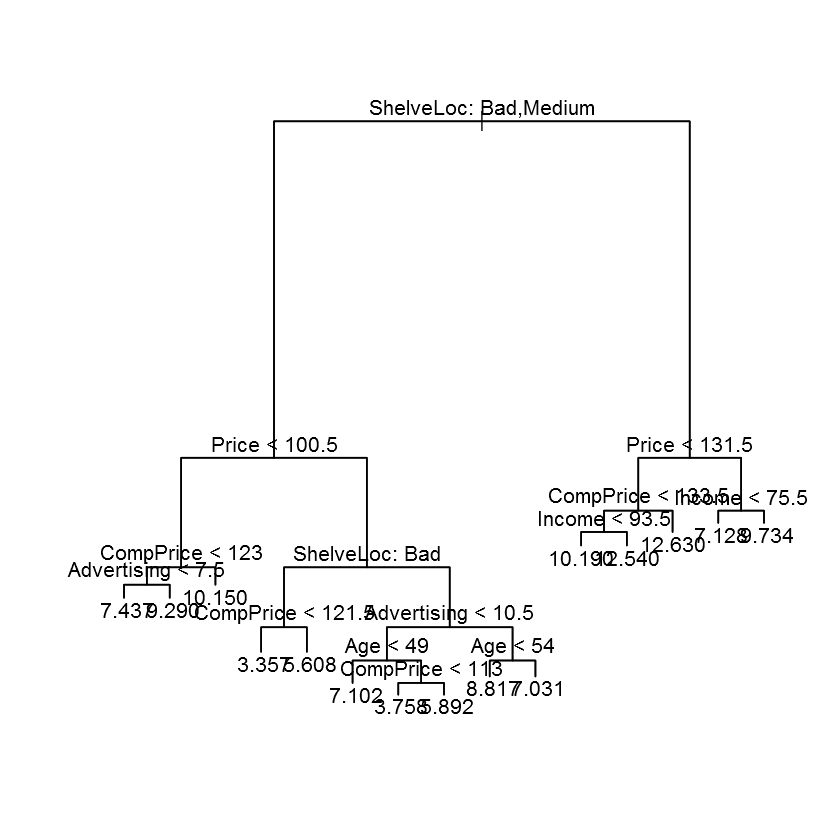

In [6]:
plot(tree.Cs)
text(tree.Cs, pretty=0)

In [7]:
yhat = predict(tree.Cs, newdata=test.X)
mean((yhat - test.Y)^2)

[1] 6.296396

## (c)

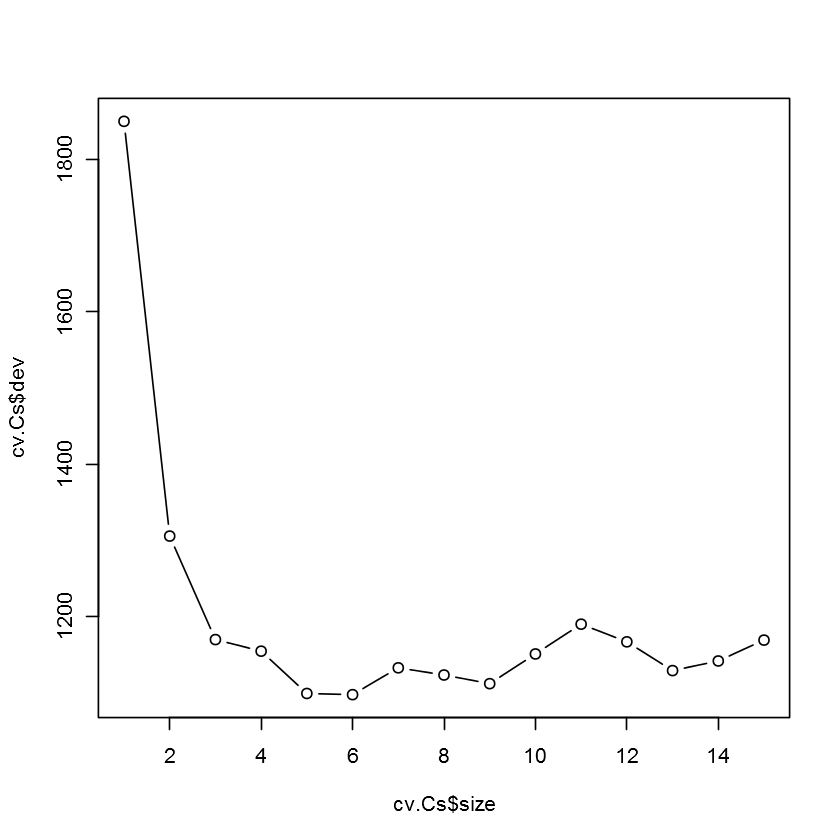

In [8]:
cv.Cs = cv.tree(tree.Cs)
plot(cv.Cs$size, cv.Cs$dev, type='b')

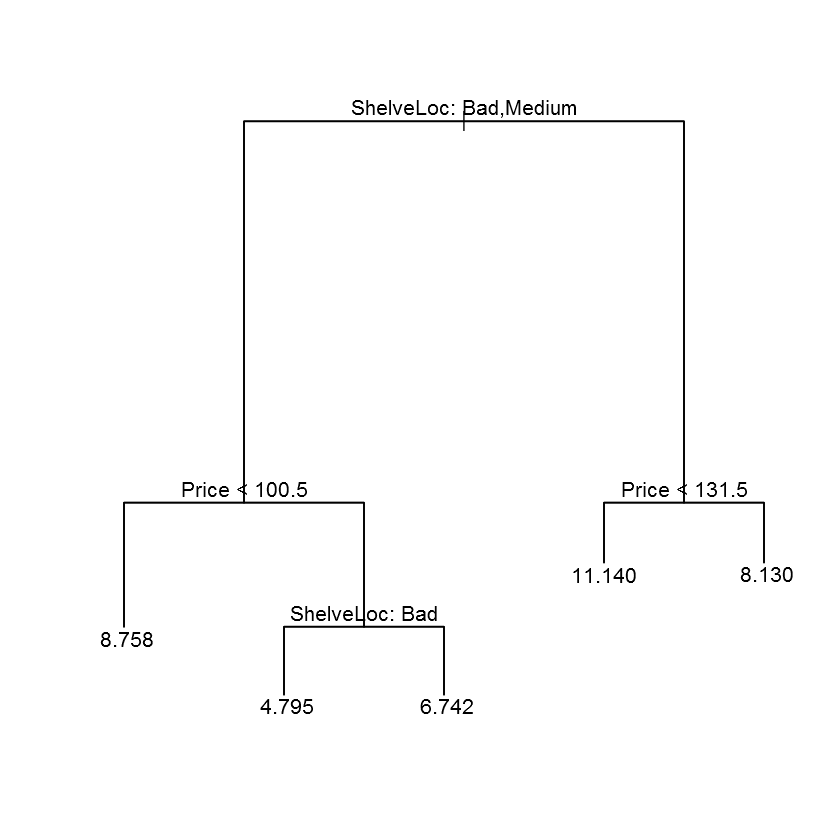

In [9]:
prune.Cs = prune.tree(tree.Cs, best=5)
plot(prune.Cs)
text(prune.Cs, pretty=0)

## (d)

In [10]:
bag.Cs = randomForest(Sales~., data=train.X, mtry=10, importance=TRUE)
bag.Cs


Call:
 randomForest(formula = Sales ~ ., data = train.X, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.532235
                    % Var explained: 66.98

In [11]:
importance(bag.Cs)

,%IncMSE,IncNodePurity
CompPrice,30.93741,227.64521
Income,8.115804,98.746210
Advertising,18.76349,115.82641
Population,1.360022,61.753703
Price,55.08969,460.49640
ShelveLoc,71.80304,661.15997
Age,13.11145,125.31003
Education,1.716625,42.623457
Urban,0.5567416,4.9897975
US,1.540401,8.597319


## (e)

In [12]:
rf5.Cs = randomForest(Sales~., data=train.X, mtry=5, importance=TRUE)
rf5.Cs


Call:
 randomForest(formula = Sales ~ ., data = train.X, mtry = 5, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 2.662986
                    % Var explained: 65.27

In [13]:
importance(rf5.Cs)

,%IncMSE,IncNodePurity
CompPrice,21.9965,205.4559
Income,4.538932,113.243021
Advertising,14.93146,153.37959
Population,-0.1723849,87.1827085
Price,43.45135,411.41043
ShelveLoc,59.06456,574.11021
Age,11.90966,157.33423
Education,0.6765148,59.3938461
Urban,-1.222462,9.256131
US,3.36400,13.89941


In [14]:
rf3.Cs = randomForest(Sales~., data=train.X, mtry=3, importance=TRUE)
rf3.Cs


Call:
 randomForest(formula = Sales ~ ., data = train.X, mtry = 3, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 2.975816
                    % Var explained: 61.19

In [15]:
importance(rf3.Cs)

,%IncMSE,IncNodePurity
CompPrice,15.78177,191.19366
Income,3.415135,129.817578
Advertising,13.55702,176.22545
Population,0.8927755,122.2716107
Price,35.75932,373.35801
ShelveLoc,44.50827,465.19209
Age,9.054334,170.911274
Education,-0.2837906,74.2689792
Urban,-0.5154087,14.9568517
US,2.636041,26.657221


In [16]:
rf8.Cs = randomForest(Sales~., data=train.X, mtry=8, importance=TRUE)
rf8.Cs


Call:
 randomForest(formula = Sales ~ ., data = train.X, mtry = 8, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 2.587441
                    % Var explained: 66.26

In [17]:
importance(rf8.Cs)

,%IncMSE,IncNodePurity
CompPrice,30.56855,219.48012
Income,6.203424,101.104601
Advertising,17.89002,130.35797
Population,1.659651,67.780589
Price,52.32649,449.50847
ShelveLoc,65.63856,621.98729
Age,14.77193,132.25621
Education,-0.1299801,48.5808603
Urban,0.3719157,5.8880254
US,0.7256005,9.5897654


# Exercise 10

## (a)

In [18]:
Hit = na.omit(Hitters)
Hit <- within(Hit, {
    Salary <- log(Salary)
})

In [19]:
summary(Hit)

     AtBat            Hits           HmRun            Runs       
 Min.   : 19.0   Min.   :  1.0   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:282.5   1st Qu.: 71.5   1st Qu.: 5.00   1st Qu.: 33.50  
 Median :413.0   Median :103.0   Median : 9.00   Median : 52.00  
 Mean   :403.6   Mean   :107.8   Mean   :11.62   Mean   : 54.75  
 3rd Qu.:526.0   3rd Qu.:141.5   3rd Qu.:18.00   3rd Qu.: 73.00  
 Max.   :687.0   Max.   :238.0   Max.   :40.00   Max.   :130.00  
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 30.00   1st Qu.: 23.00   1st Qu.: 4.000   1st Qu.:  842.5  
 Median : 47.00   Median : 37.00   Median : 6.000   Median : 1931.0  
 Mean   : 51.49   Mean   : 41.11   Mean   : 7.312   Mean   : 2657.5  
 3rd Qu.: 71.00   3rd Qu.: 57.00   3rd Qu.:10.000   3rd Qu.: 3890.5  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0  
     CHits            CHmRun           CRuns    

In [20]:
str(Hit)

'data.frame':	263 obs. of  20 variables:
 $ AtBat    : int  315 479 496 321 594 185 298 323 401 574 ...
 $ Hits     : int  81 130 141 87 169 37 73 81 92 159 ...
 $ HmRun    : int  7 18 20 10 4 1 0 6 17 21 ...
 $ Runs     : int  24 66 65 39 74 23 24 26 49 107 ...
 $ RBI      : int  38 72 78 42 51 8 24 32 66 75 ...
 $ Walks    : int  39 76 37 30 35 21 7 8 65 59 ...
 $ Years    : int  14 3 11 2 11 2 3 2 13 10 ...
 $ CAtBat   : int  3449 1624 5628 396 4408 214 509 341 5206 4631 ...
 $ CHits    : int  835 457 1575 101 1133 42 108 86 1332 1300 ...
 $ CHmRun   : int  69 63 225 12 19 1 0 6 253 90 ...
 $ CRuns    : int  321 224 828 48 501 30 41 32 784 702 ...
 $ CRBI     : int  414 266 838 46 336 9 37 34 890 504 ...
 $ CWalks   : int  375 263 354 33 194 24 12 8 866 488 ...
 $ League   : Factor w/ 2 levels "A","N": 2 1 2 2 1 2 1 2 1 1 ...
 $ Division : Factor w/ 2 levels "E","W": 2 2 1 1 2 1 2 2 1 1 ...
 $ PutOuts  : int  632 880 200 805 282 76 121 143 0 238 ...
 $ Assists  : int  43 82 11 40 42

## (b)

In [21]:
train = 1:200
test.X  = Hit[-train, ]
train.X = Hit[train, ]
test.Y  = Hit$Salary[-train]
train.Y = Hit$Salary[train]

## (c)

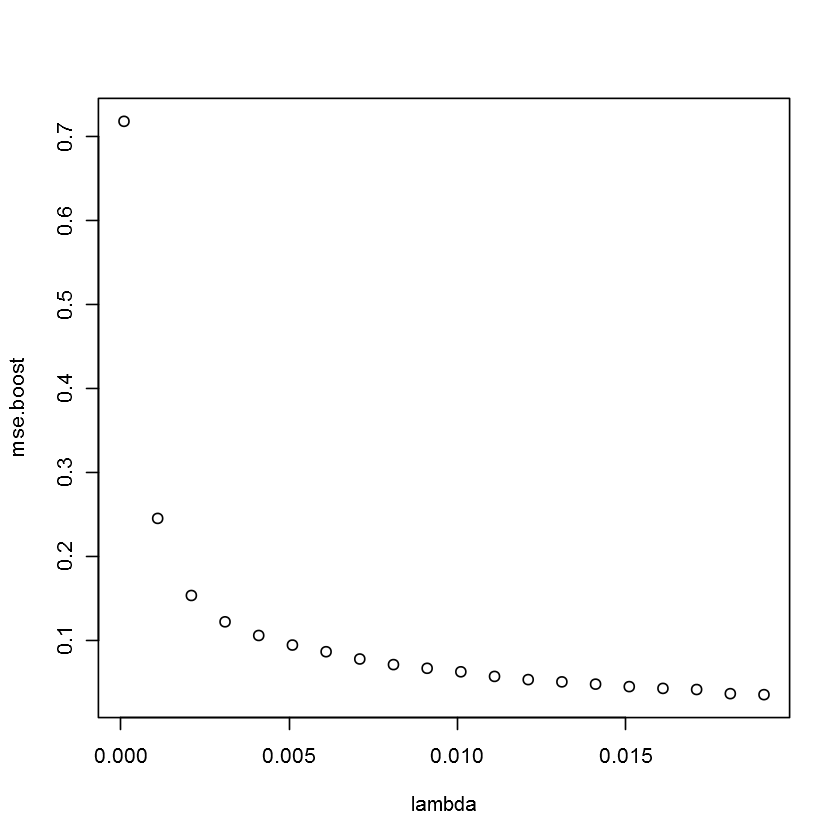

In [22]:
lambda <- seq(0.0001, 0.02, 0.001)
mse.boost <- rep(0, length(lambda))
for (i in 1:length(lambda)) {
    boost.Hit  = gbm(Salary~., data=train.X, distribution="gaussian", n.trees=1000,
                 interaction.depth=4, shrinkage=lambda[i])
    yhat.boost = predict(boost.Hit, n.trees=1000)
    mse.boost[i] = mean((yhat.boost - train.Y)^2)
}
plot(lambda, mse.boost)

## (d)

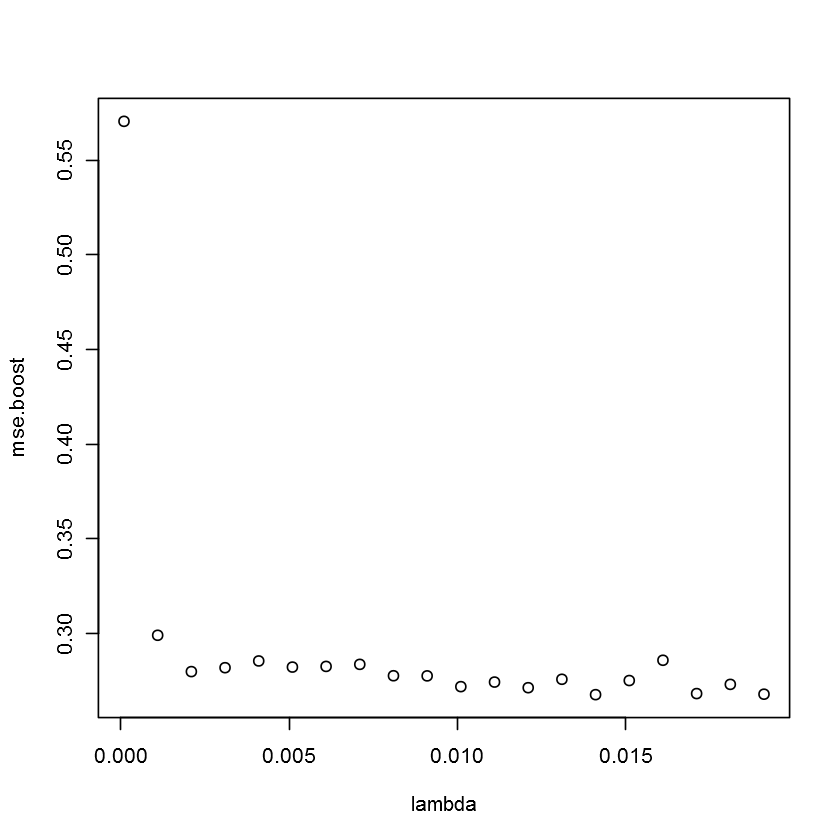

In [23]:
mse.boost <- rep(0, length(lambda))
for (i in 1:length(lambda)) {
    boost.Hit  = gbm(Salary~., data=train.X, distribution="gaussian", n.trees=1000,
                 interaction.depth=4, shrinkage=lambda[i])
    yhat.boost = predict(boost.Hit, newdata=test.X, n.trees=1000)
    mse.boost[i] = mean((yhat.boost - test.Y)^2)
}
plot(lambda, mse.boost)

## (e)

In [24]:
lm.fit = lm(Salary ~ ., data=train.X)
mean((test.Y-predict(lm.fit, test.X))^2)

[1] 0.4917959

In [25]:
lmda = 0.02
boost.Hit  = gbm(Salary~., data=train.X, distribution="gaussian", n.trees=1000,
                 interaction.depth=4, shrinkage=lmda)
yhat.boost = predict(boost.Hit, newdata=test.X, n.trees=1000)
mean((yhat.boost - test.Y)^2)

[1] 0.2734184

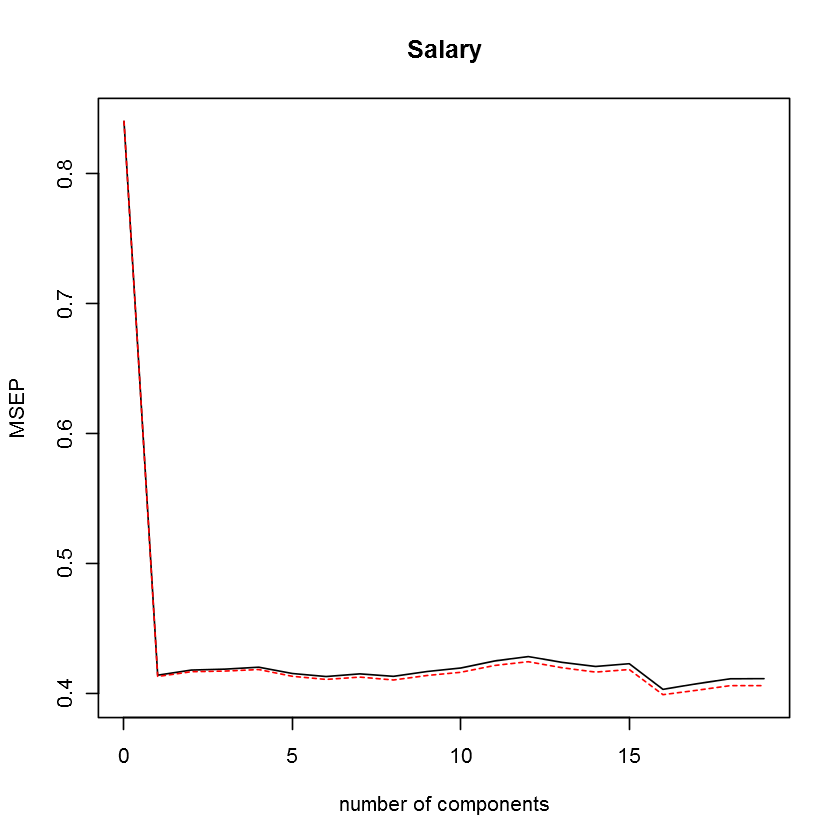

In [26]:
pcr.fit=pcr(Salary~., data=train.X, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

In [27]:
pcr.pred=predict(pcr.fit, test.X, ncomp=5)
mean((pcr.pred - test.Y)^2)

[1] 0.4665664

## (f)

,var,rel.inf
CAtBat,CAtBat,28.079224549116
CRBI,CRBI,10.5136223994526
CWalks,CWalks,9.48270610454664
CHits,CHits,6.10334099340965
PutOuts,PutOuts,5.4727765378729
CRuns,CRuns,5.2475410860396
Walks,Walks,5.14277336424722
CHmRun,CHmRun,4.5601751132824
Years,Years,4.47314373880125
AtBat,AtBat,3.98213505236413


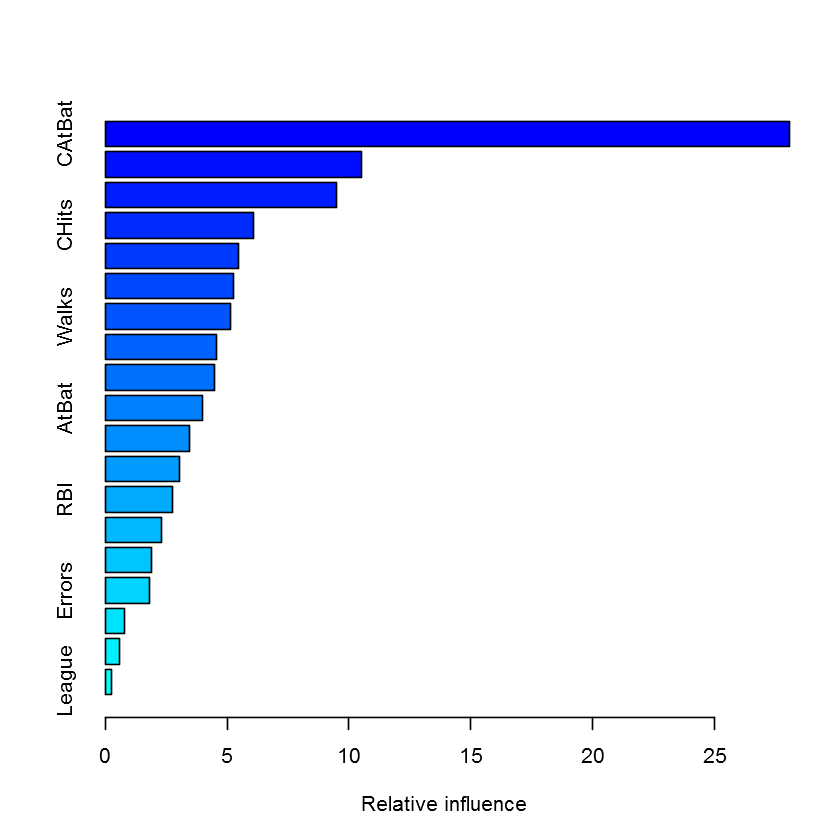

In [28]:
summary(boost.Hit)

## (g)

In [29]:
bag.Hit = randomForest(Salary~., data=train.X, mtry=19, importance=TRUE)
bag.Hit


Call:
 randomForest(formula = Salary ~ ., data = train.X, mtry = 19,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 19

          Mean of squared residuals: 0.2189139
                    % Var explained: 73.69

In [30]:
yhat.bag = predict(bag.Hit, newdata=test.X)
mean((yhat.bag - test.Y)^2)

[1] 0.2333216

# Exercise 11

In [31]:
str(Caravan)

'data.frame':	5822 obs. of  86 variables:
 $ MOSTYPE : num  33 37 37 9 40 23 39 33 33 11 ...
 $ MAANTHUI: num  1 1 1 1 1 1 2 1 1 2 ...
 $ MGEMOMV : num  3 2 2 3 4 2 3 2 2 3 ...
 $ MGEMLEEF: num  2 2 2 3 2 1 2 3 4 3 ...
 $ MOSHOOFD: num  8 8 8 3 10 5 9 8 8 3 ...
 $ MGODRK  : num  0 1 0 2 1 0 2 0 0 3 ...
 $ MGODPR  : num  5 4 4 3 4 5 2 7 1 5 ...
 $ MGODOV  : num  1 1 2 2 1 0 0 0 3 0 ...
 $ MGODGE  : num  3 4 4 4 4 5 5 2 6 2 ...
 $ MRELGE  : num  7 6 3 5 7 0 7 7 6 7 ...
 $ MRELSA  : num  0 2 2 2 1 6 2 2 0 0 ...
 $ MRELOV  : num  2 2 4 2 2 3 0 0 3 2 ...
 $ MFALLEEN: num  1 0 4 2 2 3 0 0 3 2 ...
 $ MFGEKIND: num  2 4 4 3 4 5 3 5 3 2 ...
 $ MFWEKIND: num  6 5 2 4 4 2 6 4 3 6 ...
 $ MOPLHOOG: num  1 0 0 3 5 0 0 0 0 0 ...
 $ MOPLMIDD: num  2 5 5 4 4 5 4 3 1 4 ...
 $ MOPLLAAG: num  7 4 4 2 0 4 5 6 8 5 ...
 $ MBERHOOG: num  1 0 0 4 0 2 0 2 1 2 ...
 $ MBERZELF: num  0 0 0 0 5 0 0 0 1 0 ...
 $ MBERBOER: num  1 0 0 0 4 0 0 0 0 0 ...
 $ MBERMIDD: num  2 5 7 3 0 4 4 2 1 3 ...
 $ MBERARBG: num  5 0 0 

In [32]:
summary(Caravan)

    MOSTYPE         MAANTHUI         MGEMOMV         MGEMLEEF    
 Min.   : 1.00   Min.   : 1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:10.00   1st Qu.: 1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :30.00   Median : 1.000   Median :3.000   Median :3.000  
 Mean   :24.25   Mean   : 1.111   Mean   :2.679   Mean   :2.991  
 3rd Qu.:35.00   3rd Qu.: 1.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :41.00   Max.   :10.000   Max.   :5.000   Max.   :6.000  
    MOSHOOFD          MGODRK           MGODPR          MGODOV    
 Min.   : 1.000   Min.   :0.0000   Min.   :0.000   Min.   :0.00  
 1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:0.00  
 Median : 7.000   Median :0.0000   Median :5.000   Median :1.00  
 Mean   : 5.774   Mean   :0.6965   Mean   :4.627   Mean   :1.07  
 3rd Qu.: 8.000   3rd Qu.:1.0000   3rd Qu.:6.000   3rd Qu.:2.00  
 Max.   :10.000   Max.   :9.0000   Max.   :9.000   Max.   :5.00  
     MGODGE          MRELGE          MRELSA           MRELOV    
 Min.   :0.

## (a)

In [33]:
train = 1:1000
Cr = Caravan
Cr <- within(Cr, {
    Purchase <- as.integer(Purchase) - 1
})
test.X  = Cr[-train, ]
train.X = Cr[train, ]
test.Y  = Caravan$Purchase[-train]
train.Y = Cr$Purchase[train]

## (b)

Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
"variable 50: PVRAAUT has no variation."Warning message in gbm.fit(x, y, offset = offset, distribution = distribution, w = w, :
"variable 71: AVRAAUT has no variation."

,var,rel.inf
PPERSAUT,PPERSAUT,7.66475118178085
MGODGE,MGODGE,4.84083773472796
MOPLHOOG,MOPLHOOG,4.55857193636889
PBRAND,PBRAND,4.48435703032886
MOSTYPE,MOSTYPE,4.15261840991647
MKOOPKLA,MKOOPKLA,4.04360898157451
MGODPR,MGODPR,3.67768703950535
MINK3045,MINK3045,3.4665046065164
MBERMIDD,MBERMIDD,3.40368081653708
MAUT2,MAUT2,3.23347345074627


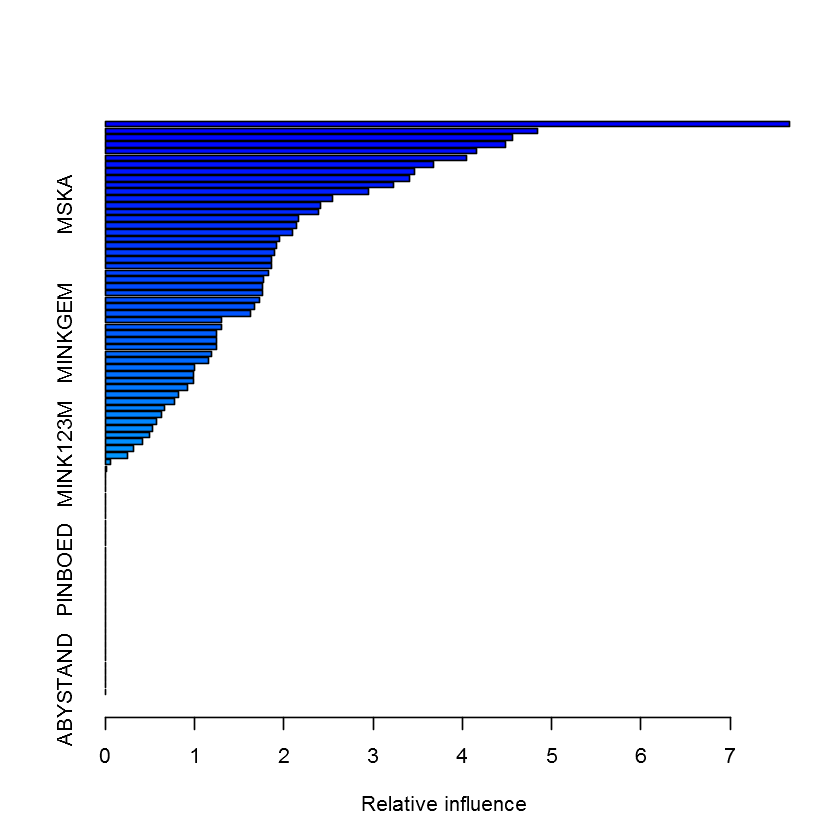

In [34]:
lmda = 0.01
boost.Cr  = gbm(Purchase~., data=train.X, distribution="bernoulli", n.trees=1000,
                 interaction.depth=4, shrinkage=lmda)
summary(boost.Cr)

## (c)

In [35]:
yhat.boost = predict(boost.Cr, newdata=test.X, n.trees=1000, type="response")
min(yhat.boost)

[1] 0.002230971

In [36]:
yhat.boost[yhat.boost > 0.2] = "Yes"
yhat.boost[yhat.boost < 0.2] = "No"

In [37]:
table(yhat.boost, test.Y)

          test.Y
yhat.boost   No  Yes
       No  4348  254
       Yes  185   35

In [38]:
mean(yhat.boost == test.Y)

[1] 0.9089589

In [39]:
glm.fit = glm(Purchase~., data=train.X, family=binomial)
glm.probs = predict(glm.fit, newdata=test.X, type="response")
glm.pred = rep("No", nrow(test.X))
glm.pred[glm.probs > 0.2] = "Yes"
table(glm.pred, test.Y)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

        test.Y
glm.pred   No  Yes
     No  4183  231
     Yes  350   58

In [40]:
mean(glm.pred == test.Y)

[1] 0.8795106